假设输入输出间为线性关系，其中$\mathit{x} \in \mathbb{R}^n$,$\mathit{w} \in \mathbb{R}^n$,预测输出为$\widehat{\mathit{y}}$。定义输出为：

$$\widehat{\mathit{y}} = w^TX$$

使用均方误差作为P来衡量模型的性能，则损失函数为（其中$\frac{1}{2m}$的2加在常数项不影响结果）：

$$loss = \frac{1}{2m} \sum_{i=1}^{m} (\widehat{\mathit{y}}^{(i)} - y^{(i)})^2$$

则目标任务则为：

$$argmin loss: argmin \frac{1}{2m} \sum_{i=1}^{m} (\widehat{\mathit{y}}^{(i)} - y^{(i)})^2$$

可以直观的得出当$\widehat{\mathit{y}} - y$时loss最小，则问题可转化为

$$argmin \frac{1}{2m} ||\widehat{\mathit{y}} - y||_2^2$$

设$Cost = \frac{1}{2m} ||\widehat{\mathit{y}} - y||_2^2$，对$\mathit{w}$求导如下：

$$\mathit{ \frac{d}{dw}Cost = \frac{1}{m} \frac{d(Xw - y)^T(Xw - y)}{dw} }$$ 

$$\mathit{ = \frac{1}{2m} \frac{d(Xw - y)^T(Xw - y)}{dw} }$$

$$\mathit{ = \frac{1}{2m} \frac{d(w^TX^TXw - w^TX^Ty - y^TXw + y^Ty)}{dw} }$$

标量转置为其本身：

$$\mathit{ = \frac{1}{2m} \frac{d(w^TX^TXw - 2y^TXw + y^Ty)}{dw} }$$

$$\mathit{ \frac{d}{dw}Cost = \frac{1}{m} X^T(Xw - y) }$$

使用梯度下降法同步更新$\mathit{w}$：

$$\mathit{ w = w - \alpha \frac{d}{dw}Cost }$$

其中“偏置”通过训练时在样本中增加全1个体获取。


In [1]:
import sys
import os

sys.path.append("%s\\.." % os.getcwd())

import numpy as np
from arsenal.data_process.plot_data import Ploter
from arsenal.data_process.load_data import DataLoader
from arsenal.optimizer.grad_descent import GradDescent

In [2]:
class LinearRegression(object):
    def __init__(self):
        self.ploter = Ploter()
        self.data_loader = DataLoader()
    def lr_func(self, X, w):
        return np.dot(X, w) #适应实际数据形式
    def lr_cost(self, X, w, y):
        m = X.shape[0]
        h = self.lr_func(X, w)
        cost = (1/2/m) * np.dot((h-y).T, h-y)
        return cost
    def lr_grad(self, X, w, y, m):
        h = self.lr_func(X, w)
        grad_w = (1/m) * np.dot(X.T, h - y)
        return grad_w


Testing the cost function ...
With w = [0 ; 0], Cost computed =  [[ 32.07273388]]
Expected cost value (approx) 32.07
With w = [-1 ; 2], Cost computed =  [[ 54.24245508]]
Expected cost value (approx) 54.24
Iteration: 0, Cost: 6.737190
Iteration: 10, Cost: 5.859828
Iteration: 20, Cost: 5.810818
Iteration: 30, Cost: 5.763545
Iteration: 40, Cost: 5.717947
Iteration: 50, Cost: 5.673965
Iteration: 60, Cost: 5.631543
Iteration: 70, Cost: 5.590623
Iteration: 80, Cost: 5.551154
Iteration: 90, Cost: 5.513084
Iteration: 100, Cost: 5.476363
Iteration: 110, Cost: 5.440943
Iteration: 120, Cost: 5.406779
Iteration: 130, Cost: 5.373825
Iteration: 140, Cost: 5.342040
Iteration: 150, Cost: 5.311381
Iteration: 160, Cost: 5.281808
Iteration: 170, Cost: 5.253284
Iteration: 180, Cost: 5.225771
Iteration: 190, Cost: 5.199232
Iteration: 200, Cost: 5.173635
Iteration: 210, Cost: 5.148944
Iteration: 220, Cost: 5.125129
Iteration: 230, Cost: 5.102157
Iteration: 240, Cost: 5.080000
Iteration: 250, Cost: 5.058628

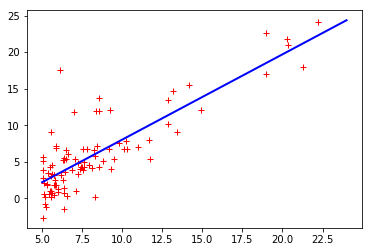

In [14]:
if '__main__' == __name__:
    test = LinearRegression()
    
    #加载数据
    data_path = './data/ex1data1.txt'
    data = test.data_loader.load(data_path=data_path)
    X = data[:,0]
    if (1 == len(X.shape)):
        X = X.reshape(X.shape[0], 1)
    y = data[:,1]
    if (1 == len(y.shape)):
        y = y.reshape(y.shape[0], 1)
    
    #设置初始值及超参数
    costs = []
    step = 10
    iterations = 1500
    learning_rate = 0.01
    X_ = np.c_[np.ones((X.shape[0], 1)), X]
    m = X_.shape[0]
    n = X_.shape[1]
    w = np.zeros((n, 1))
    optimizer = GradDescent()
    
    #测试Cost计算
    print("\nTesting the cost function ...")
    Cost = test.lr_cost(X_, w, y);
    print("With w = [0 ; 0], Cost computed = ", Cost);
    print("Expected cost value (approx) 32.07");
    
    Cost = test.lr_cost(X_, np.array(([-1], [2])), y);
    print("With w = [-1 ; 2], Cost computed = ", Cost);
    print("Expected cost value (approx) 54.24");
    
    #测试梯度下降
    for i in range(iterations):
        
        grad_w= test.lr_grad(X_, w, y, m)
        w = optimizer.descent(grad_w, w, rate=learning_rate)
        
        if 0 == (i % step):
            costs.append(test.lr_cost(X_, w, y))
            print("Iteration: %d, Cost: %f" % (i, costs[-1]))
    print('Theta found by gradient descent:')
    print('w: ', w)
    print('Expected theta values (approx):')
    print(' -3.6303\n  1.1664\n')
    
    index = np.arange(0,iterations, step).reshape(iterations//step, 1)
    costs = np.array((costs)).reshape(len(costs),1)
    #test.ploter.plot(index, np.array((costs)), set_str = 'r-')
    
    #预测结果
    x1 = np.array(([1, 3.5]))
    predict1 = np.dot(x1, w)
    print("For population = 35,000, we predict a profit of ", float(predict1)*10000)
    
    index = np.array(([1, 5], [1, 24]))
    res = np.dot(index, w)

    test.ploter.plot(X, y)
    test.ploter.plot(np.array(([5],[24])), res, set_str='b-')
    test.ploter.show()
    